In [1]:
%pdb on

Automatic pdb calling has been turned ON


In [2]:
import sys
import random
import math
import operator
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error
import sklearn
import sklearn.datasets
import sklearn.linear_model
import os.path
from IPython.core.debugger import Tracer
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import time

In [3]:
a=np.zeros([3,2])

In [4]:
a[0,:]=[5,4]

In [5]:
a

array([[ 5.,  4.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [6]:
campaign="2997"
folder='../../make-ipinyou-data'
resultsfolder='../results'
trainYzxFile=os.path.join(folder,campaign,'train.yzx.txt')
testYzxFile=os.path.join(folder,campaign,'test.yzx.txt')

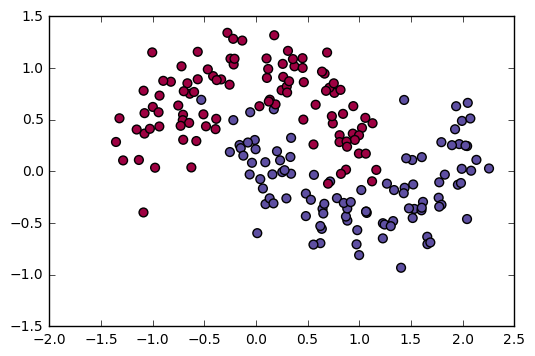

In [7]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [8]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [9]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [10]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [11]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [12]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in xrange(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print "Loss after iteration %i: %f" %(i, calculate_loss(model))
    
    return model

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.068926
Loss after iteration 3000: 0.071218
Loss after iteration 4000: 0.071253
Loss after iteration 5000: 0.071278
Loss after iteration 6000: 0.071293
Loss after iteration 7000: 0.071303
Loss after iteration 8000: 0.071308
Loss after iteration 9000: 0.071312
Loss after iteration 10000: 0.071314
Loss after iteration 11000: 0.071315
Loss after iteration 12000: 0.071315
Loss after iteration 13000: 0.071316
Loss after iteration 14000: 0.071316
Loss after iteration 15000: 0.071316
Loss after iteration 16000: 0.071316
Loss after iteration 17000: 0.071316
Loss after iteration 18000: 0.071316
Loss after iteration 19000: 0.071316


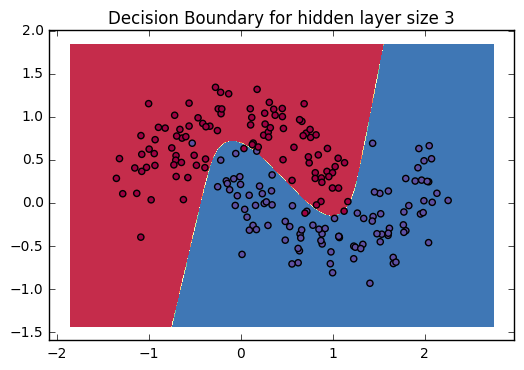

In [13]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

In [14]:
bufferCaseNum = 1000000
eta = 0.01 # learning rate
lamb = 1E-6 # regularization parameter
featWeight = {}
random.seed(10)
initWeight = 0.05

def nextInitWeight():
    return (random.random() - 0.5) * initWeight
def ints(s):
    res = []
    for ss in s:
        res.append(int(ss))
    return res
def sigmoid(p):
    return 1.0 / (1.0 + math.exp(-p))

# Training: LOGISTIC REGRESSION

In [15]:
fi = open(trainYzxFile, 'r')
bufLineNum = 0
trainData = []
y = []
yp = []
for line in fi:
    bufLineNum = (bufLineNum + 1) % bufferCaseNum
    trainData.append(ints(line.replace(":1", "").split()))
    if bufLineNum == 0:
        for data in trainData:
            clk = data[0]
            mp = data[1]
            fsid = 2 # feature start id
            # predict
            pred = 0.0
            for i in range(fsid, len(data)):
                feat = data[i]
                if feat not in featWeight:
                    featWeight[feat] = nextInitWeight()
                pred += featWeight[feat]
            pred = sigmoid(pred)
            y.append(clk)
            yp.append(pred)
            # start to update weight
            # w_i = w_i + learning_rate * [ (y - p) * x_i - lamb * w_i ] 
            for i in range(fsid, len(data)):
                feat = data[i]
                featWeight[feat] = featWeight[feat] * (1 - lamb) + eta * (clk - pred)
        trainData = []
# complete iterations when nr lines < bufferCaseNum
if len(trainData) > 0:
    for data in trainData:
        clk = data[0] # click
        mp = data[1] # market price
        fsid = 2 # feature start id
        # predict
        pred = 0.0
        for i in range(fsid, len(data)):
            feat = data[i]
            if feat not in featWeight:
                featWeight[feat] = nextInitWeight()
            pred += featWeight[feat]
        pred = sigmoid(pred)
        y.append(clk)
        yp.append(pred)
        # start to update weight
        # w_i = w_i + learning_rate * [ (y - p) * x_i - lamb * w_i ]
        for i in range(fsid, len(data)):
            feat = data[i]
            featWeight[feat] = featWeight[feat] * (1 - lamb) + eta * (clk - pred)
fi.close()
auc = roc_auc_score(y, yp)
rmse = math.sqrt(mean_squared_error(y, yp))
print 'LR Train: ' + '\t' + str(auc) + '\t' + str(rmse)

LR Train: 	0.632296107648	0.0665449038499


# Training: NEURAL NETS

In [ ]:
firstFeatNr = 27
nrFeat = len(featWeight)
print 'Nr features: ' + str(nrFeat)
nn_input_dim = nrFeat
nn_hdim = 10
nn_output_dim = 2
num_passes = 1

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

bufferCaseNum = 100
num_examples = bufferCaseNum # training set size

Nr features: 133515


In [ ]:
np.random.seed(0)
W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
b1 = np.zeros((1, nn_hdim))
W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
b2 = np.zeros((1, nn_output_dim))
fi = open(trainYzxFile, 'r')
lineNum = 0
trainData = []
y = []
yp = []
nrLines = 0
for line in fi:
    nrLines += 1
    lineNum = (lineNum + 1) % bufferCaseNum
    trainData.append(ints(line.replace(":1", "").split()))
    if lineNum == 0:
        X = np.zeros((bufferCaseNum,nrFeat))
        dataLineNum = 0
        for data in trainData:
            clk = data[0]
            y.append(clk)
            mp = data[1]
            #fsid = 2 # feature start id 
            fsid = 3 # as all data[2]=0!?!
            for i in range(fsid, len(data)):
                X[dataLineNum,data[i] - firstFeatNr] = 1
            dataLineNum += 1
        for i in xrange(0, num_passes):
            time0 = time.time()
            # Forward propagation
            z1 = X.dot(W1) + b1
            a1 = np.tanh(z1)
            z2 = a1.dot(W2) + b2
            exp_scores = np.exp(z2)
            probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
            if i == num_passes - 1:
                yp.extend(probs[:,1])
            # Backpropagation
            delta3 = probs
            delta3[range(num_examples), clk] -= 1
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(X.T, delta2)
            db1 = np.sum(delta2, axis=0)

            # Add regularization terms (b1 and b2 don't have regularization terms)
            dW2 += reg_lambda * W2
            dW1 += reg_lambda * W1

            # Gradient descent parameter update
            W1 += -epsilon * dW1
            b1 += -epsilon * db1
            W2 += -epsilon * dW2
            b2 += -epsilon * db2
            time1 = time.time()
            #print 'Iter:' + '\t' + str(i) + '\t' + 'Time:' + '\t' + str(time1 - time0)
        trainData = []
auc = roc_auc_score(y, yp)
rmse = math.sqrt(mean_squared_error(y, yp))
print 'NN Train: ' + '\t' + str(auc) + '\t' + str(rmse)
Tracer()()
# complete iterations when nr lines < bufferCaseNum
if len(trainData) > 0:
    X = np.zeros((len(trainData),nrFeat))
    for data in trainData:
        clk = data[0] # click
        mp = data[1] # market price
        #fsid = 2 # feature start id
        fsid = 3 # as all data[2]=0!?!
        # predict
        pred = 0.0
        for i in range(fsid, len(data)):
            feat = data[i]
            if feat not in featWeight:
                featWeight[feat] = nextInitWeight()
            pred += featWeight[feat]
        pred = sigmoid(pred)
        y.append(clk)
        yp.append(pred)
        # start to update weight
        # w_i = w_i + learning_rate * [ (y - p) * x_i - lamb * w_i ]
        for i in range(fsid, len(data)):
            feat = data[i]
            featWeight[feat] = featWeight[feat] * (1 - lamb) + eta * (clk - pred)
auc = roc_auc_score(y, yp)
rmse = math.sqrt(mean_squared_error(y, yp))
print 'NN Train: ' + '\t' + str(auc) + '\t' + str(rmse)
# close trainYzxFile
fi.close()

Tracer()()

# Testing: LOGISTIC REGRESSION

num_passes = 1
NN Train: 	0.530687996247	0.0910345737046

In [ ]:
y = []
yp = []
fi = open(testYzxFile, 'r')
for line in fi:
    data = ints(line.replace(":1", "").split())
    clk = data[0] # click
    mp = data[1] # market price
    fsid = 2 # feature start id
    pred = 0.0
    for i in range(fsid, len(data)):
        feat = data[i]
        if feat in featWeight:
            pred += featWeight[feat]
    pred = sigmoid(pred)
    y.append(clk)
    yp.append(pred)
fi.close()
auc = roc_auc_score(y, yp)
rmse = math.sqrt(mean_squared_error(y, yp))
print 'Test: ' + '\t' + str(round) + '\t' + str(auc) + '\t' + str(rmse)
    
# output the weights
fo = open(trainYzxFile + '.lr.weight', 'w')
featvalue = sorted(featWeight.iteritems(), key=operator.itemgetter(0))
for fv in featvalue:
    fo.write(str(fv[0]) + '\t' + str(fv[1]) + '\n')
fo.close()


# output the prediction
fi = open(testYzxFile, 'r')
fo = open(testYzxFile + '.lr.pred', 'w')

for line in fi:
    data = ints(line.replace(":1", "").split())
    pred = 0.0
    for i in range(1, len(data)):
        feat = data[i]
        if feat in featWeight:
            pred += featWeight[feat]
    pred = sigmoid(pred)
    fo.write(str(pred) + '\n')    
fo.close()
fi.close()